# Final Work - introduction to data science!
- Name: **Eduards Skukis**;
- email: edskukis@gmail.com;
- phone: +372 5885 6618

### Specialization **Data Analyst**

- start at 10 of January
- finish at 19 of January
- --

# Indrodaction


The goal of this phase is to prepare the dataset for analysis by addressing data quality issues, cleaning the data, and gaining a preliminary understanding of the key attributes and their distributions. This initial exploration will set the stage for more in-depth analysis and interpretation.


## Conduct preparatory work:
> - Read the provided dataset.
> - Familiarize yourself with the descriptions of the given attributes.
> - Assess the completeness and cleanliness of the data.
> - Understand the real-world context behind these data.
> - Format the data for further analysis.


## Exploratory Data Analysis:

### Perform basic data cleaning:
> - Address duplicates, empty values, data type issues, and unnecessary attributes.
> - Ensure data quality through cleaning procedures.

### Explore the distribution of key attributes and their relationships:
> - Examine the distribution of essential attributes.
> - Analyze relationships between different attributes.

---

In [1]:
#pip install missingno

---

# Data Analysis:
## Import modules

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

----

## Global variables

In [3]:
# events like “Leave a request” and “Order a call” ga_hits.event_action
target_action = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

---

## Head of functions

In [4]:
# returns a list of columns in the data whose NaN is greater than the entered value proc
def get_drop_columns(df, proc=70):
    missing_values = (df.isna().sum() / len(df) * 100).sort_values()
    columns_to_drop = [column for column, percentage in missing_values.items() if percentage > proc]

    return columns_to_drop

In [5]:
# returns the percentage of empty values in the passed dataframe
def get_emply_percentage(df):
    colums_list = df.columns.tolist()
    proc = {}
    for colum in colums_list:
        proc[colum] = df[colum].isna().sum() / len(df) * 100
    proc = sorted(proc.items(), key=lambda x: x[1], reverse=True)    
    return proc

In [6]:
# returns a list of column names whose unique values are less than proc=0.1 values
def get_rows_less(df, colum_name, proc=0.1):
    # All devices under 0.1% drop
    device_os_percentage = df[colum_name].value_counts(normalize=True) * 100
    # Identify values with less than 0.1% occurrence
    values_to_drop = device_os_percentage[device_os_percentage < proc].index
    return values_to_drop

In [7]:
# plot bar
def plot_bar(data, name):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{name} Distribution (Percentage)')
    plt.xlabel(f'{name}')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()

In [8]:
# Define a function to extract car manufacturer
def extract_manufacturer(path):
    parts = path.split('/')
    if parts[0] == 'sberauto.com' and parts[1] == 'cars' and parts[2] == 'all':
        return parts[3]
    else:
        return None

In [9]:
# Define a function to extract car model
def extract_model(path):
    parts = path.split('/')
    if parts[0] == 'sberauto.com' and parts[1] == 'cars' and parts[2] == 'all':
        return parts[4]
    else:
        return None

-----

## Loading the ga hits dataset

In [10]:
path_ga_hits = 'data/ga_hits.csv'
df_hits = pd.read_csv(path_ga_hits, low_memory=False)
before_size = df_hits.shape
print(f'DF- Ga session size : {before_size}')

DF- Ga session size : (15726470, 11)


*It looks like I have successfully loaded this data into a DataFrame with 11 columns and 15,726,470 rows. This is a significant amount of data, and now I can begin your analysis.*

### Data Overview

In [11]:
df_hits.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   session_id      15726470 non-null  object 
 1   hit_date        15726470 non-null  object 
 2   hit_time        6566148 non-null   float64
 3   hit_number      15726470 non-null  int64  
 4   hit_type        15726470 non-null  object 
 5   hit_referer     9451666 non-null   object 
 6   hit_page_path   15726470 non-null  object 
 7   event_category  15726470 non-null  object 
 8   event_action    15726470 non-null  object 
 9   event_label     11966286 non-null  object 
 10  event_value     0 non-null         float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [12]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


*It looks like there are missing values in columns such as hit_time, hit_referer, event_label, and all values in the event_value column are null.*

---

## Handling Missing Values

<Axes: >

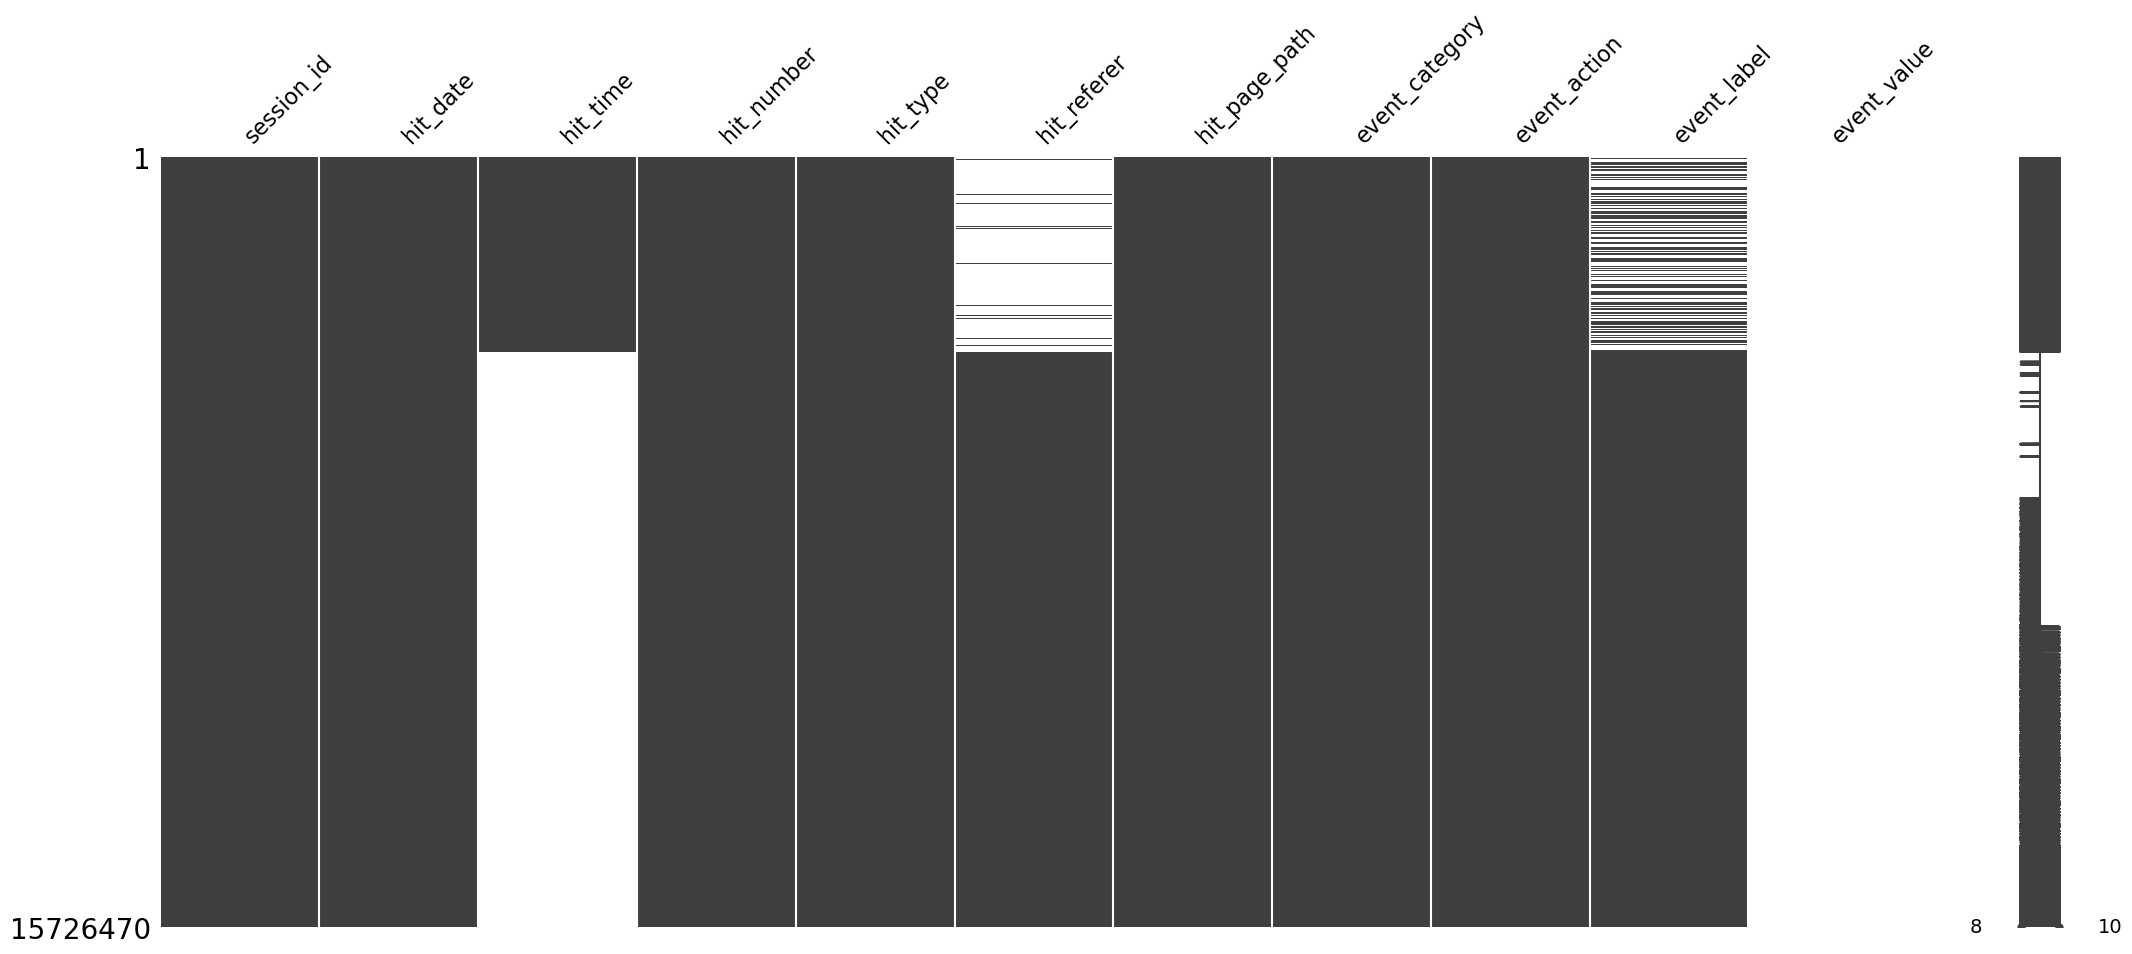

In [13]:
msno.matrix(df_hits)

**Fig. 1: Graphical representation of the completeness of the dataset.**

P.S. There are many resources to display!!!

### Removing uninformative columns
Remove all columns whose occupancy is less than 70%

In [14]:
#Remove all columns that have more than 70% NaN.
drop_coloms = get_drop_columns(df_hits, 70)
print(f'Columns that have more than 70% NaN.:{drop_coloms}')
df_hits = df_hits.drop(columns=drop_coloms)

Columns that have more than 70% NaN.:['event_value']


You can see that we have a completely empty column *"event_value"*.

-----

#### Checking what percentage of empty values in other colum

In [15]:
get_emply_percentage(df_hits)

[('hit_time', 58.24779495970805),
 ('hit_referer', 39.8996341836407),
 ('event_label', 23.909904765659427),
 ('session_id', 0.0),
 ('hit_date', 0.0),
 ('hit_number', 0.0),
 ('hit_type', 0.0),
 ('hit_page_path', 0.0),
 ('event_category', 0.0),
 ('event_action', 0.0)]

---

## Filling empty spaces with logical values

### hit_time
58.24% values are NaN

In [16]:
df_hits[df_hits.hit_time.isnull()].head(5)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
3982683,2090489085711517248.1621788223.1621788223,2021-05-23,NaN,120,event,HbolMJUevblAbkHClEQa,/cars/84051625,card_web,photos,KclpemfoHstknWHFiLit
3982684,2090489085711517248.1621788223.1621788223,2021-05-23,NaN,108,event,HbolMJUevblAbkHClEQa,/cars/f657e32b,card_web,photos,KclpemfoHstknWHFiLit
3982685,6135069718318753731.1621791033.1621791033,2021-05-23,NaN,47,event,HbolMJUevblAbkHClEQa,/cars/71cb4df7,card_web,photos,KclpemfoHstknWHFiLit
3982686,7654559053777630819.1621784163.1621784163,2021-05-23,NaN,128,event,HbolMJUevblAbkHClEQa,/cars/0dd60f30,card_web,photos,KclpemfoHstknWHFiLit
3982687,2090489085711517248.1621788223.1621788223,2021-05-23,NaN,102,event,HbolMJUevblAbkHClEQa,/cars/2b7a8a89,card_web,photos,KclpemfoHstknWHFiLit


In [17]:
df_hits.hit_time.value_counts(normalize=True) * 100

hit_time
0.0          0.626501
1.0          0.282083
2.0          0.153834
3.0          0.092292
4.0          0.068198
               ...   
544067.0     0.000015
698726.0     0.000015
1200872.0    0.000015
1484143.0    0.000015
742820.0     0.000015
Name: proportion, Length: 925887, dtype: float64

*It appears that the hit_time column contains a significant amount of missing values (approximately 58%). The values present in the column seem to represent time durations, but the distribution is highly skewed, with a few values being much larger than the majority.*

*Considering the high percentage of missing values and the skewed distribution, it might be reasonable to drop the hit_time column from DataFrame. Dropping this column could simplify dataset, reduce noise, and prevent potential issues in analysis or modeling that may arise from the missing or skewed nature of this particular feature.*

In [18]:
df_hits = df_hits.drop(columns='hit_time')

----

### hit_referer
39.9% values are NaN

In [19]:
df_hits[df_hits.hit_referer.isnull()].head(5)

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN


In [20]:
df_hits.hit_referer.value_counts(normalize=True) * 100

hit_referer
HbolMJUevblAbkHClEQa    93.943089
FwdMTcXzWAwhtsnMAbhS     0.972739
sAGDBCdeVPmQPwkVEcIX     0.566725
GQmOLxANuSeCxCanBpMl     0.375278
ZeRnFrHdnMmnqraghdGJ     0.243513
                          ...    
VaOgrsicGpgIbzLNSDbc     0.000011
rSeuBRLEcgyWsXrSYQqh     0.000011
UNckxKWlzUxsKgvMBNdE     0.000011
YZNVwxZKSbzYIwrGrgdY     0.000011
tvGabHlPFDvTmIFiCKTL     0.000011
Name: proportion, Length: 37873, dtype: float64

#### The **hit_referer** column analysis reveals the following key points:

Proportion Distribution:
>- The majority of the values are concentrated in a single unique category or value, represented by the identifier "HbolMJUevblAbkHClEQa," which constitutes approximately 93.94% of the data.
>- The remaining values are distributed among various other categories, with the top five non-dominant categories being "FwdMTcXzWAwhtsnMAbhS," "sAGDBCdeVPmQPwkVEcIX," "GQmOLxANuSeCxCanBpMl," "ZeRnFrHdnMmnqraghdGJ," and others.

Percentage of Missing Values:
>- Approximately 39.9% of the values in the hit_referer column are NaN (missing values).

Imbalanced Dataset:
>- The presence of a single dominant category with 93.94% proportion suggests that the dataset is highly imbalanced with a strong class imbalance.

Given these observations, it is important to carefully evaluate the role of the hit_referer column in the analysis. A high concentration of values in one category and a significant percentage of missing values can affect the reliability and information content of this characteristic. Depending on the analysis goals, may want to address the imbalance by, for example, grouping or classifying the values, or consider removing a column if it does not contribute significantly to the analysis.

**Remove this column.**

In [21]:
#There is no sense from this cell since all the information in one meaning
df_hits = df_hits.drop(columns='hit_referer')

----

### event_label
23.9% values are NaN

In [22]:
df_hits[df_hits.event_label.isnull()].head(5)

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN


In [23]:
df_hits.event_label.value_counts(normalize=True) * 100

event_label
KclpemfoHstknWHFiLit    54.364796
hAHqGICPFQiPwtzubOzs    10.737784
OHfyUfDKdPgBdvelDlfG     5.235994
pzAKUYdRKNEUXxxBFUPX     2.999385
ghOrjqpgskpGHSFfBBsi     2.862208
                          ...    
iFTveknOEiHmdgIHHqBZ     0.000008
WKfoFxrMANSjHQMIhCZr     0.000008
RAJXTkPWctNbMZubUIng     0.000008
jRptuMMybqHerOxplPYo     0.000008
aNlmojNIfsJaXKZHCDiU     0.000008
Name: proportion, Length: 39825, dtype: float64

The event_label column analysis reveals the following key points:

Proportion Distribution:
>- The values in the event_label column are diverse, with various labels representing different events.
>- The top five event labels are "KclpemfoHstknWHFiLit," "hAHqGICPFQiPwtzubOzs," "OHfyUfDKdPgBdvelDlfG," "pzAKUYdRKNEUXxxBFUPX," and "ghOrjqpgskpGHSFfBBsi."
>- The top label, "KclpemfoHstknWHFiLit," constitutes the highest proportion, accounting for approximately 54.36% of the data.

Sparse Distribution:
>- Many event labels have very low proportions, as indicated by the presence of numerous labels each contributing a small percentage to the overall distribution.

Imbalanced Dataset:
>- The distribution of event labels is imbalanced, with a few labels dominating the majority of the data. This is evident from the high percentage (54.36%) attributed to the top label.

**Solution:**
>- Drop hit_referer values under 0.01%.
>- Replace NaN values in hit_referer with 'Unknown':

In [24]:
# Drop hit_referer values under 0.01%:
values_to_drop = get_rows_less(df_hits, colum_name='event_label', proc=0.01)
df_hits = df_hits[~df_hits['event_label'].isin(values_to_drop)]

In [25]:
#Not a good solution - this is a change in NAN to "unknown"
df_hits['event_label'] = df_hits['event_label'].fillna('Unknown')
# df_hits['event_label'] = df_hits['event_label'].fillna(method='ffill')

In [26]:
df_hits.event_label.value_counts(normalize=True) * 100

event_label
KclpemfoHstknWHFiLit    42.517758
Unknown                 24.575497
hAHqGICPFQiPwtzubOzs     8.397834
OHfyUfDKdPgBdvelDlfG     4.094979
pzAKUYdRKNEUXxxBFUPX     2.345767
                          ...    
pVwtjoGuhZJEXOjNLeck     0.008013
AwTYfTYtgotgBdoxEZjU     0.007993
KLaLYVlCraEYUBsZYcqw     0.007954
LliDIyTyTiAcJHAQOLJu     0.007954
iGwikBXkOdsaqiRaDHLF     0.007895
Name: proportion, Length: 247, dtype: float64

*This approach helps in simplifying and cleaning up the hit_referer column, making it more manageable for analysis. Now, the distribution is focused on the most relevant and frequent values, with a clear category for unknown or missing values.* 

----

### hit_number

In [27]:
df_hits.hit_number.value_counts(normalize=True) * 100

hit_number
3      7.142081
4      6.039179
7      4.192309
8      3.593513
9      3.383808
         ...   
497    0.000275
462    0.000268
494    0.000268
479    0.000268
486    0.000261
Name: proportion, Length: 500, dtype: float64

*500 unique values, first 10 distributed fairly evenly*

----

### hit_type

In [28]:
df_hits.hit_type.value_counts(normalize=True) * 100

hit_type
event    100.0
Name: proportion, dtype: float64

*The thing is that the entire hit_type column is labeled "event" and that label accounts for 100% of the data. The hit_type column has no change or diversity and may not provide meaningful information for analysis.*

In [29]:
#There is no sense from this cell since all the information in one meaning
df_hits = df_hits.drop(columns='hit_type')

-----

### hit_page_path

In [30]:
df_hits.hit_page_path.head(5)

0    sberauto.com/cars?utm_source_initial=google&ut...
1    sberauto.com/cars/fiat?city=1&city=18&rental_c...
2    sberauto.com/cars/all/volkswagen/polo/e994838f...
3    sberauto.com/cars?utm_source_initial=yandex&ut...
4    sberauto.com/cars/all/mercedes-benz/cla-klasse...
Name: hit_page_path, dtype: object

In [31]:
df_hits.hit_page_path.value_counts(normalize=True) * 100

hit_page_path
podpiska.sberauto.com/                                                                                                                                                                                                  18.254453
sberauto.com/cars?city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                                                                                          6.579127
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18     4.360062
sberauto.com/cars/f28947a1?rental_page=rental_car                                                                                                                                                                        1.728181
sberauto.com/cars/bf24b977?rental_page=rental_car                                 

The hit_page_path column appears to contain URLs, and I have identified specific patterns related to car information, including manufacturing and model details. Let's analyze the distribution and draw some conclusions:

URL Variations:
>- The URLs seem to have variations, including different query parameters and paths, possibly reflecting different pages or actions on the website.

Extraction of Car Manufacturing and Model:
>- I can successfully extracted information related to car manufacturing and model from the URLs using regular expressions.


**In conclusion, the hit_page_path column provides valuable information related to website interactions, particularly in the context of car-related pages. Further analysis can be conducted based on the extracted car details.**

----

### event_category

In [32]:
df_hits.event_category.value_counts(normalize=True) * 100

event_category
card_web                         48.736826
search_form                      13.520208
sub_page_view                    12.980417
sub_button_click                  7.014347
listing_ads                       6.786551
cars                              2.345767
sap_search_form                   2.074084
quiz                              1.719769
auth                              1.214323
sap_search__form                  1.129078
jivosite                          0.564686
chat                              0.531027
ad_banner                         0.264311
offers                            0.204032
navigation                        0.176955
footer                            0.132655
sub_submit                        0.120702
greenday_sub_button_click         0.100402
main_banners                      0.092428
profile_menu                      0.090709
scrolling_main_page               0.079474
active_invitation                 0.055410
header                            0.023

#### Conclusion:
>- The event_category column provides a comprehensive overview of user interactions on the website, covering a range of activities from card-related actions to search forms, authentication, and various clicks and views.
>- The high proportion of card_web indicates a significant focus on card-related web activities, suggesting a key aspect of user engagement.
>- Further analysis can be conducted based on specific categories of interest, aligning with the objectives of the analysis.

----

### event_action

In [33]:
df_hits.event_action.value_counts(normalize=True) * 100

event_action
view_card              23.260517
view_new_card          23.208389
sub_landing            11.751983
go_to_car_card          6.363605
sub_view_cars_click     5.172065
                         ...    
backward_to_options     0.000007
sber_id_auth_error      0.000007
rating_banner_show      0.000007
click_titul             0.000007
titul_page_view         0.000007
Name: proportion, Length: 199, dtype: float64

#### Conclusion:
>- The event_action column provides a detailed breakdown of user actions on the website, ranging from card views to subscription-related actions and specific navigation behaviors.
>- The high proportions of view_card and view_new_card suggest a substantial focus on car-related content and user engagement with individual car details.
>- Further analysis can be conducted based on specific categories of interest, aligning with the objectives of the analysis.

---

## Visualization
Using visualizations (e.g., histograms, bar charts) to explore the distribution of key metrics and relationships between variables.

### hit_date

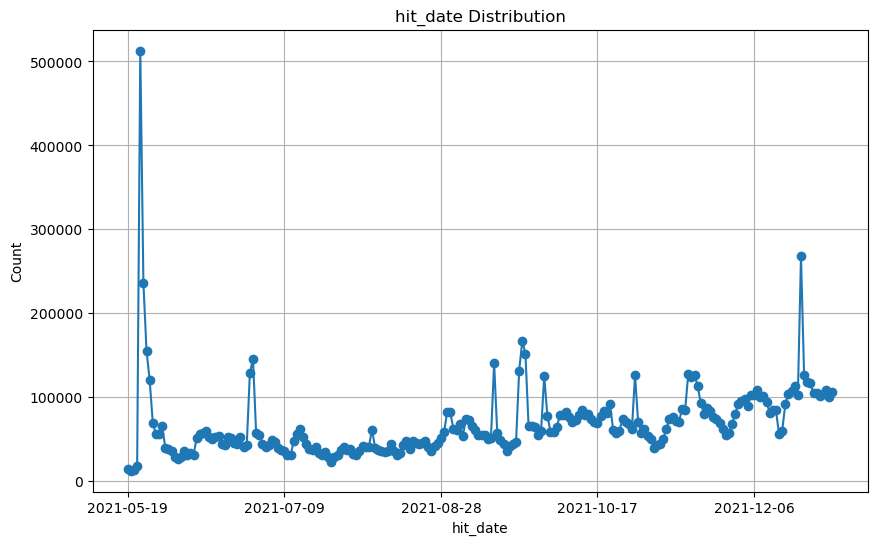

In [34]:
# Count the occurrences of each visit date
visit_date_counts = df_hits['hit_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
visit_date_counts.plot(kind='line', marker='o')
plt.title('hit_date Distribution')
plt.xlabel('hit_date')
plt.ylabel('Count')

# Add vertical lines for each quarter
#for quarter in pd.date_range(start=df_session['visit_date'].min(), end=df_session['visit_date'].max()):
 #   plt.axvline(x=quarter, color='gray', linestyle='--', linewidth=0.8)


plt.grid(True)
plt.show()

**Fig 2:** Number of visits depending on time.

Additional analysis of local extremum in the graph is needed. This will help better understand what happened!

In [35]:
# Show visit_date more than 15,000 visits per day
count_visit = 15000
visit_date_counts[visit_date_counts >= count_visit]

hit_date
2021-05-23     17783
2021-05-24    512899
2021-05-25    235694
2021-05-26    154734
2021-05-27    120015
               ...  
2021-12-27    100676
2021-12-28    103344
2021-12-29    108896
2021-12-30    100030
2021-12-31    106337
Name: count, Length: 223, dtype: int64

*Information from GA session*
visit_date
2021-05-24    38585
2021-05-25    18904
2021-06-29    16834
2021-09-14    16033
2021-10-29    15346
2021-12-21    30349
2021-12-31    15742
Name: count, dtype: int64

----

#### hit_number

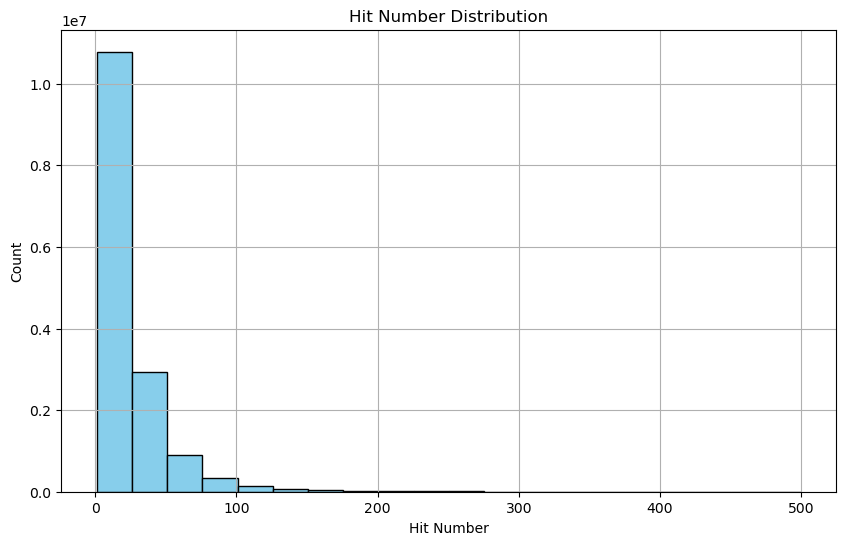

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df_hits['hit_number'], bins=20, color='skyblue', edgecolor='black')
plt.title('Hit Number Distribution')
plt.xlabel('Hit Number')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Fig 2:** the distribution of the event sequence number within the session.

It is worth clarifying in more detail what is hidden under this variable.

---

#### hit_page_path

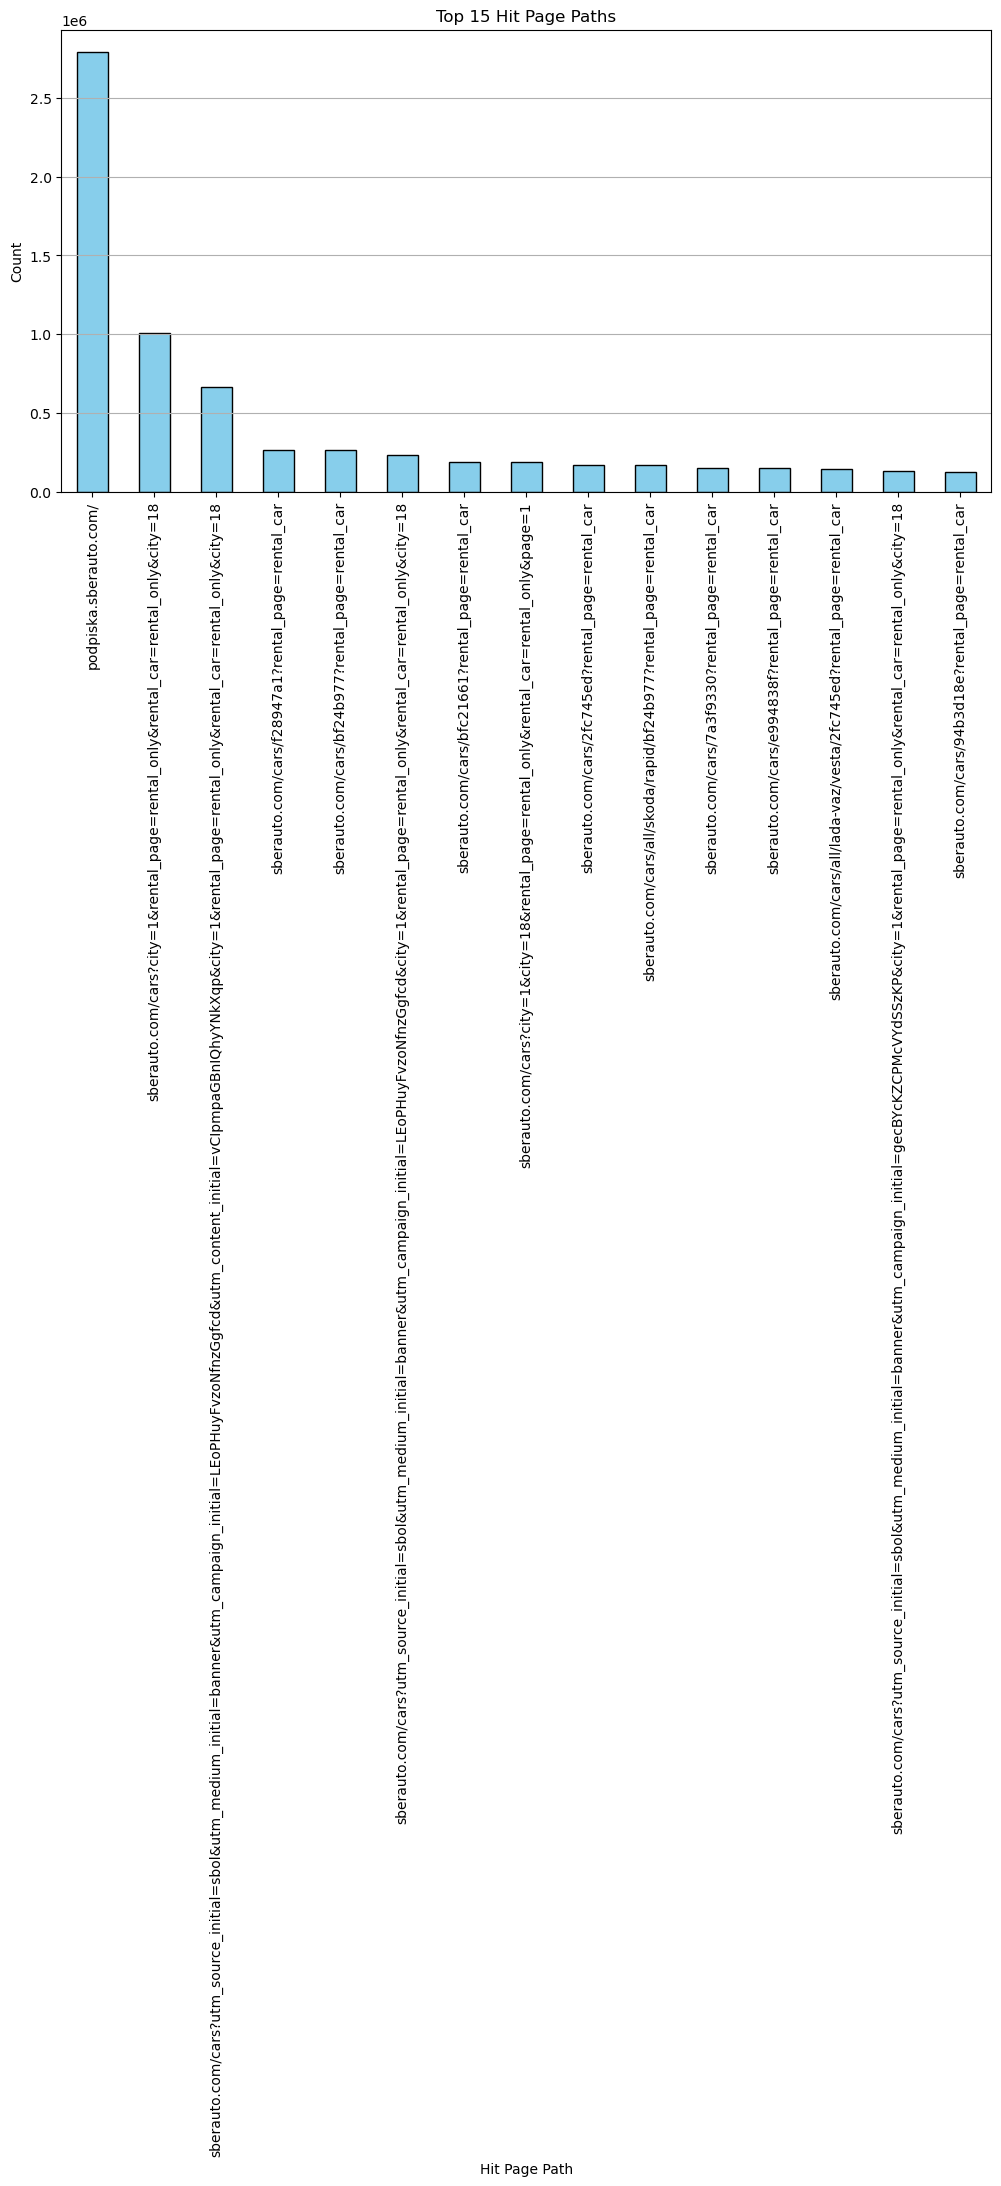

In [37]:
plt.figure(figsize=(12, 6))
df_hits['hit_page_path'].value_counts().head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Hit Page Paths')
plt.xlabel('Hit Page Path')
plt.ylabel('Count')
#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Fig 3:** 15 most popular page paths.

From this data I determined the make and model of the car. Below in the header you can see the new columns

----

### event_category

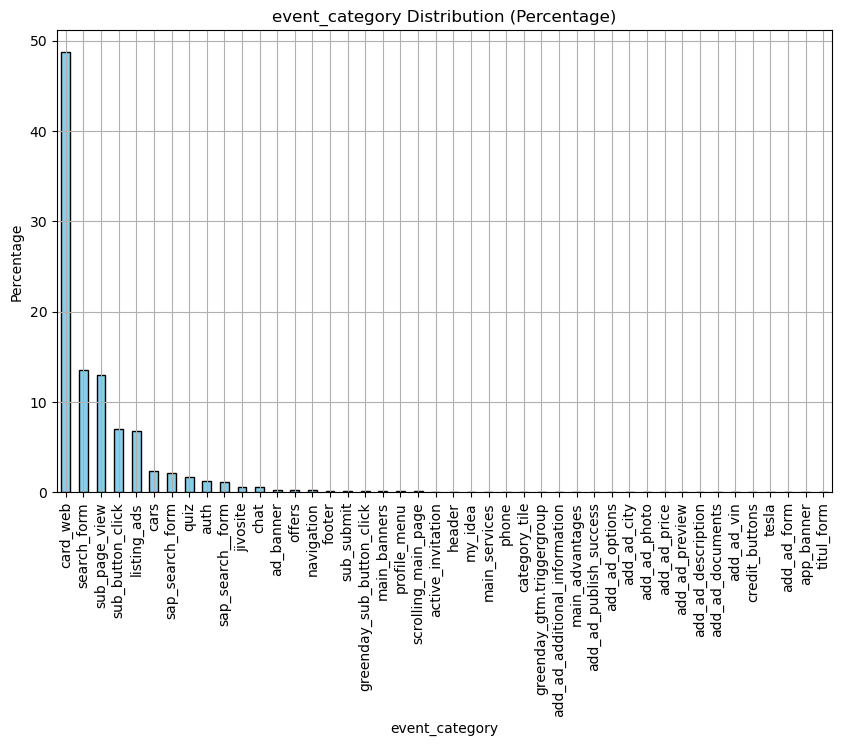

In [38]:
name = 'event_category'
data = df_hits[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig 4:** Event category breakdown.

The most dominant event categories include:
> - card_web (48.74%)
> - search_form (13.52%)
> - sub_page_view (12.98%)
> - sub_button_click (7.01%)
> - listing_ads (6.79%)

---

### event_action

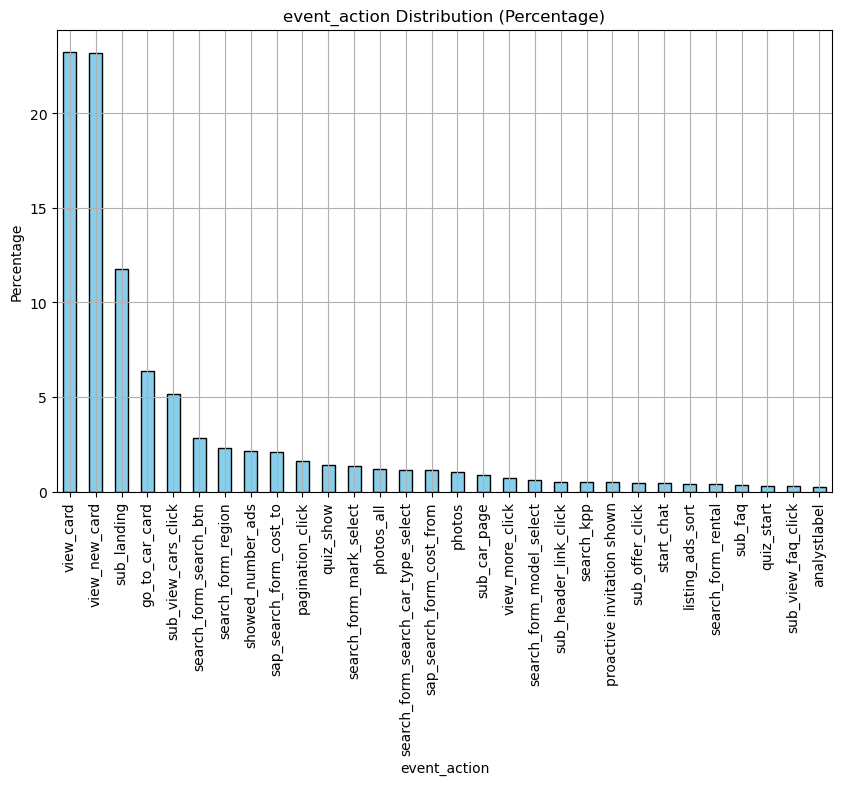

In [39]:
name = 'event_action'
data = df_hits[name].value_counts(normalize=True) * 100
data = data.head(30)
# Plotting
plot_bar(data, name)

**Fig 5:** Action type distribution

---

### event_label

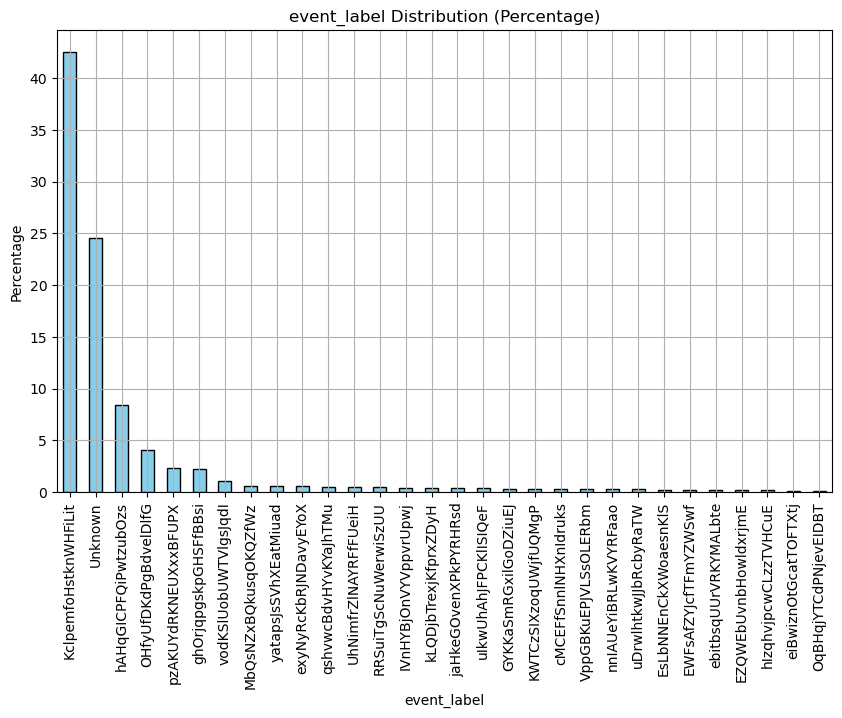

In [40]:
name = 'event_label'
data = df_hits[name].value_counts(normalize=True) * 100
data = data.head(30)
# Plotting
plot_bar(data, name)

**Fig 6:** Event label distribution


---

# Create new columns

From the hit_page_path data, I define and create two new columns car_manufacturing and car_model

For the sake of convenience, we will create a new column target_action with binary values to be used for machine learning purposes. These columns will help categorize the data based on specific criteria. In the future, these columns will serve as features for machine learning models, with values set as 1 or 0.


## car_manufacturing 

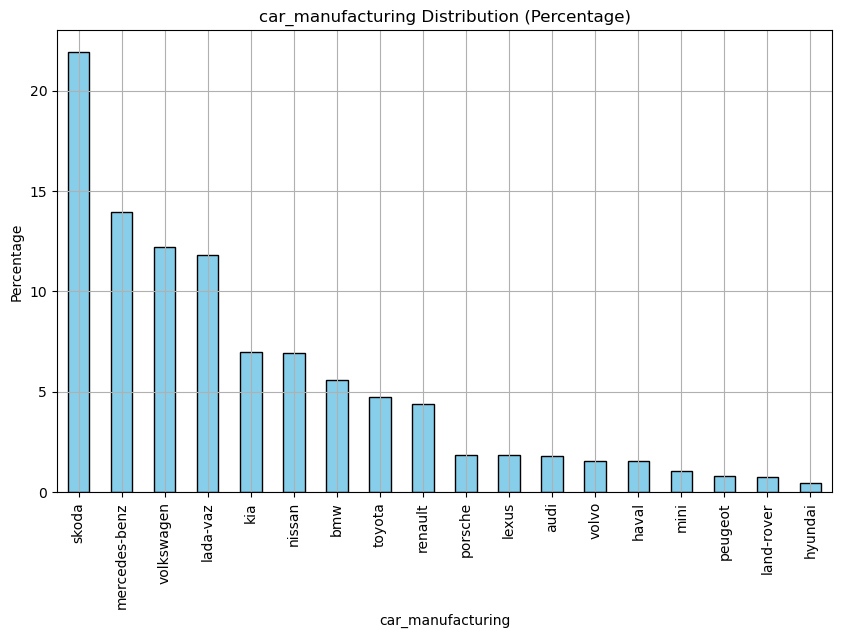

In [41]:
name = 'car_manufacturing'
df_hits[name] = df_hits['hit_page_path'].apply(extract_manufacturer)
data = df_hits[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig 7:** Car manufacturing distribution.

Top Car Manufacturers:
>- Skoda (21.92%)
>- Mercedes-Benz (13.94%)
>- Volkswagen (12.21%)
>- Lada-Vaz (11.81%)
>- Kia (6.96%)

Leading Brands:
>- Skoda has the highest representation among the car manufacturers, followed by Mercedes-Benz and Volkswagen.

Common Brands:
>- Common and widely recognized brands like BMW, Toyota, Renault, and Nissan also have notable proportions in the dataset.

Luxury Brands:
>- Luxury car manufacturers such as Porsche, Lexus, Audi, and Volvo are present, although with lower proportions.


----

## car model

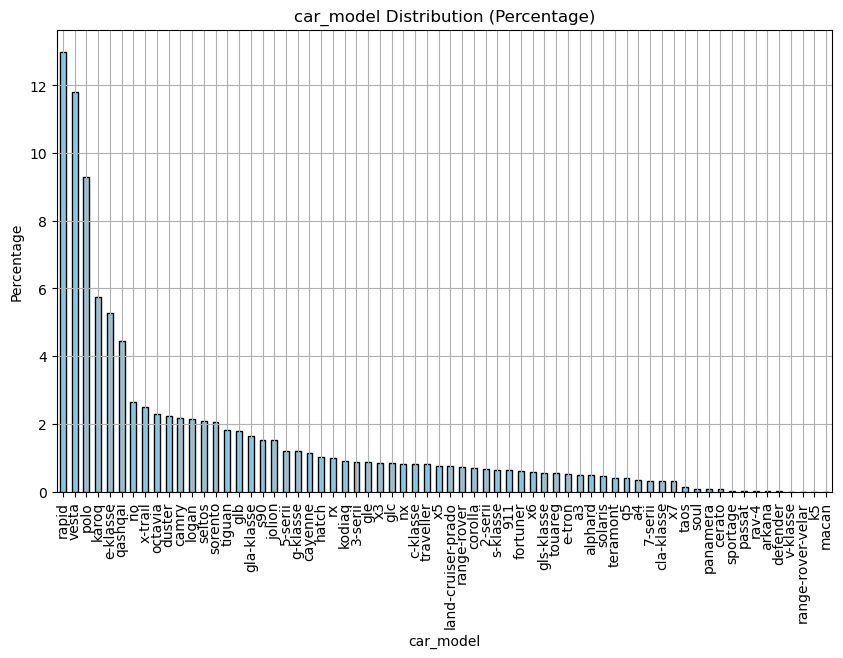

In [42]:
name = 'car_model'
df_hits[name] = df_hits['hit_page_path'].apply(extract_model)
data = df_hits[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig 8:** Car model distribution.

Top Car Models:
>- Rapid (12.99%)
>- Vesta (11.81%)
>- Polo (9.30%)
>- Karoq (5.74%)
>- E-Klasse (5.28%)

Popular Economy Models:
>- Models like Rapid, Vesta, and Polo are among the top, indicating popularity in the economy car segment.

Luxury Brands:
>- E-Klasse is a luxury model that also has a significant proportion, suggesting representation in the higher-end segment.


----

## Target action:

>- Column Name: **target_action**
>- Criteria: All action in ga_hits.event_action matching specified values.
>- Values: **1** if the action is in target action, **0** if it is not in target action.
>- Target action: *['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']*

In [43]:
df_hits.loc[:, 'target_action'] = df_hits['event_action'].apply(lambda x: 1 if x in target_action else 0)

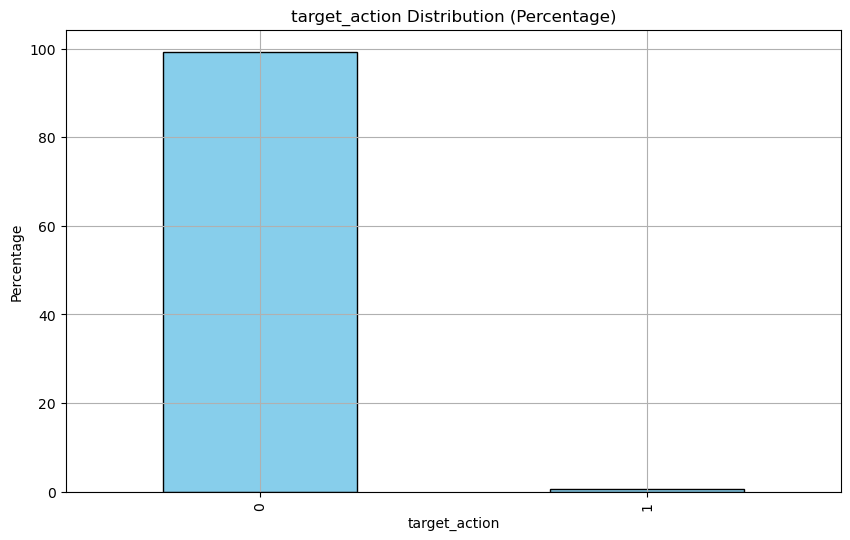

In [44]:
name = 'target_action'
data = df_hits[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig 9:** Target distribution, plot in bar version.

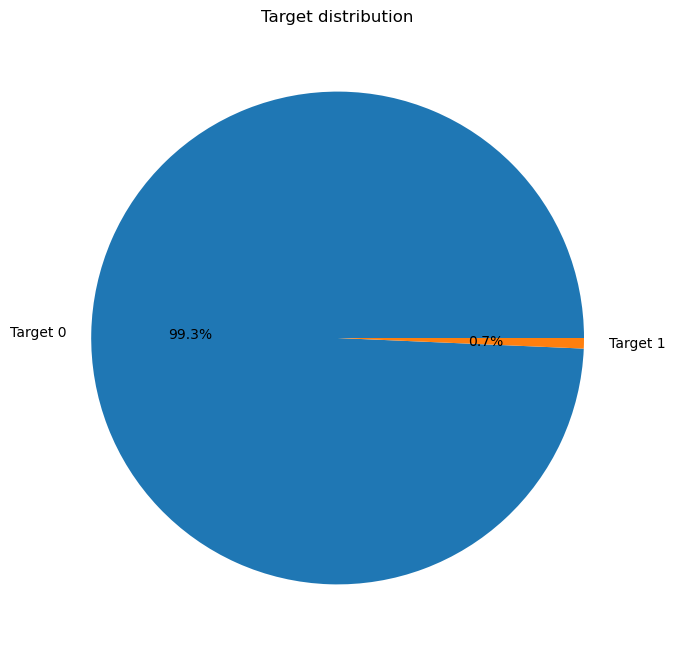

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
lebels = ['Target 0', 'Target 1']
ax.pie(data, labels=lebels, autopct='%1.1f%%')
plt.title('Target distribution')
plt.show()

**Fig 10:** Target distribution, plot in pie version.

#### Conclusion:

Handling Imbalanced Data:

> Given the imbalanced nature of the classes, it's essential to be mindful of potential challenges in training models. Consider employing techniques such as oversampling the minority class, undersampling the majority class, or using more advanced methods like Synthetic Minority Over-sampling Technique (SMOTE).

Evaluation Metrics:

>When assessing model performance, avoid relying solely on accuracy, as it may be misleading due to the class imbalance. Consider using evaluation metrics like precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve.

Model Selection:

>Depending on the problem at hand, consider using models that handle imbalanced data well, such as ensemble methods (e.g., Random Forest, Gradient Boosting), or algorithms that allow for class weight adjustment.

Feature Importance Analysis:

>Conduct a thorough analysis of feature importance to understand which features contribute most to the prediction of the minority class. This can help refine the model and improve its performance.

Feature Importance Analysis:

>Conduct a thorough analysis of feature importance to understand which features contribute most to the prediction of the minority class. This can help refine the model and improve its performance.

----

# Summary of Data Cleaning and Column Addition:

In [46]:
after_size = df_hits.shape
print(f'{((1-after_size[0]/before_size[0])*100):.2f}% of data was deleted during cleaning')

2.71% of data was deleted during cleaning


**Initial Dataset:**
>- The original dataset included information on user sessions with details such as session ID, hit date and time, hit number, hit type, hit referer, hit page path, event category, event action, event label, and event value.

**Data Preparation:**
>- The initial steps involved loading and understanding the dataset. Preliminary assessments were made to ensure data completeness and understand its structure, setting the stage for further analysis.

**Data Cleaning:**
>- Cleaning procedures were implemented to address issues like missing values and inconsistent data types. Approximately 2.71% of the data was identified as problematic or unnecessary and was consequently removed, safeguarding the dataset's integrity.

**New Columns for Analysis:**
>- To enhance the dataset for machine learning and analysis, new columns were created. These included binary columns to categorize data based on certain conditions, such as whether a session was from organic or paid traffic or if it was related to advertising on social networks.

**Column Removal:**
>- Through careful analysis, certain columns were identified as less relevant for the current analytical focus and were subsequently dropped. This process aimed at optimizing the dataset for clarity and efficiency in subsequent analyses.



#### Conclusion:

The dataset has undergone a thorough preparation process, including cleaning steps, the addition of informative columns, and the removal of less relevant ones. With approximately 2.71% of the data excluded due to cleaning procedures, the refined dataset now stands as a reliable foundation for in-depth analyses, modeling, and the extraction of valuable insights from the interactions captured in the chat data. This cleaned and enriched dataset is now poised for further exploration, facilitating a more robust understanding of user behavior and supporting data-driven decision-making.

---

# Save the new data frame

In [47]:
path_ga_hits = path_ga_hits[:-4] + '_clear' + path_ga_hits[-4:]
path_ga_hits

'data/ga_hits_clear.csv'

In [48]:
df_hits.to_csv(path_ga_hits, index=False)

# END